# Benzinga Assignment

Manish Parihar

Problem Statement:
Benzinga is a stock market site which aims to educate people through their content. The primary goal of this assignment is to create a small piece of content through the data provided to you in the csv file which is attached to this email.

The goal of this assignment is to create a program which takes two dates as an input and makes a story by filling out a template (the template would be written by you). The content should communicate what the overall highest and lowest prices of Apple stock (AAPL) were between any two defined dates. Once the content is made, please create a graph using your favourite library. This graph should map each day’s high and low prices between the two input dates.

The program can be provided as a python script or as a Jupyter notebook file that will run in the same directory as the CSV data file.

In [1]:
# import frameworks
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
# load the dataset
df = pd.read_csv ('/Users/manishparihar/Desktop/Benzinga/apple_price_history.csv')
# display first five data
df.head(5)

,open,high,low,close,volume,time,dateTime
0,133.52,133.6116,126.760,129.41,143301890,1609718400000,2021-01-04T15:00:00.000-05:00
1,128.89,131.7400,128.430,131.01,97664898,1609804800000,2021-01-05T15:00:00.000-05:00
2,127.72,131.0499,126.382,126.60,155087970,1609891200000,2021-01-06T15:00:00.000-05:00
3,128.36,131.6300,127.860,130.92,109578157,1609977600000,2021-01-07T15:00:00.000-05:00
4,132.43,132.6300,130.230,132.05,105158245,1610064000000,2021-01-08T15:00:00.000-05:00


Data Describtion :-

Open : Price at which security first trades

High : Highest Price of the trading day

Low : Lowest Price of the trading day

Close : Last Price the stock traded during the trading day

Volume : Number of Shares that changed hands during the trading day
    
Time : Price that is adjusts Coroporate Actions on Closing Price

Date : Date of trading

In [3]:
# diplay dimension of data - its shows number of (rows,column)
df.shape

(58, 7)

In [4]:
# Create copy of original dataframe before start working
apple_stock = df.copy()

In [5]:
apple_stock['date'] = pd.to_datetime(apple_stock['dateTime'],utc=True)

In [6]:
apple_stock['new_date'] = pd.to_datetime(apple_stock['date']).dt.date

In [7]:
# Deleting Old Date
apple_stock.drop("date", axis=1, inplace=True)

In [8]:
apple_stock.drop("dateTime",axis=1, inplace=True)

In [9]:
apple_stock.head(5)

,open,high,low,close,volume,time,new_date
0,133.52,133.6116,126.760,129.41,143301890,1609718400000,2021-01-04
1,128.89,131.7400,128.430,131.01,97664898,1609804800000,2021-01-05
2,127.72,131.0499,126.382,126.60,155087970,1609891200000,2021-01-06
3,128.36,131.6300,127.860,130.92,109578157,1609977600000,2021-01-07
4,132.43,132.6300,130.230,132.05,105158245,1610064000000,2021-01-08


In [10]:
# Converting Date to DateTime Object
apple_stock['new_date'] = pd.to_datetime(apple_stock['new_date'],format='%Y-%m-%d')

In [11]:
# Summary Statistic - its a statistical data like percentile, mean etc.
apple_stock.describe()

,open,high,low,close,volume,time
count,58.000000,58.000000,58.000000,58.000000,5.800000e+01,5.800000e+01
mean,128.999138,130.474847,126.996778,128.709397,1.106594e+08,1.613255e+12
std,6.676690,6.630543,6.526116,6.747340,3.022834e+07,2.123763e+09
min,119.030000,121.000000,116.210000,116.360000,6.014513e+07,1.609718e+12
25%,122.992500,124.392500,120.705000,122.180000,8.996614e+07,1.611554e+12
50%,128.580000,130.197100,126.969000,128.855000,1.041180e+08,1.613261e+12
75%,135.205000,135.950000,133.390000,134.090000,1.212347e+08,1.615097e+12
max,143.600000,145.090000,141.370000,143.160000,1.855495e+08,1.616717e+12


In [12]:
# Exploring data - Check useful info like non-null value , integer, float
apple_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 7 columns):
open        58 non-null float64
high        58 non-null float64
low         58 non-null float64
close       58 non-null float64
volume      58 non-null int64
time        58 non-null int64
new_date    58 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 3.3 KB


In [13]:
# Rename the new date column with date
apple_stock = apple_stock.rename(columns = {"new_date":"date"})

In [14]:
##Making Date as Index 
apple_stock.set_index('date',inplace=True)
apple_stock['date'] = apple_stock.index

In [15]:
apple_stock.head(5)

,open,high,low,close,volume,time,date
date,,,,,,,
2021-01-04,133.52,133.6116,126.760,129.41,143301890,1609718400000,2021-01-04
2021-01-05,128.89,131.7400,128.430,131.01,97664898,1609804800000,2021-01-05
2021-01-06,127.72,131.0499,126.382,126.60,155087970,1609891200000,2021-01-06
2021-01-07,128.36,131.6300,127.860,130.92,109578157,1609977600000,2021-01-07
2021-01-08,132.43,132.6300,130.230,132.05,105158245,1610064000000,2021-01-08


In [16]:
##Checking Null Values
apple_stock.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
time      0
date      0
dtype: int64

# Exploratory Data Analysis

/Users/manishparihar/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


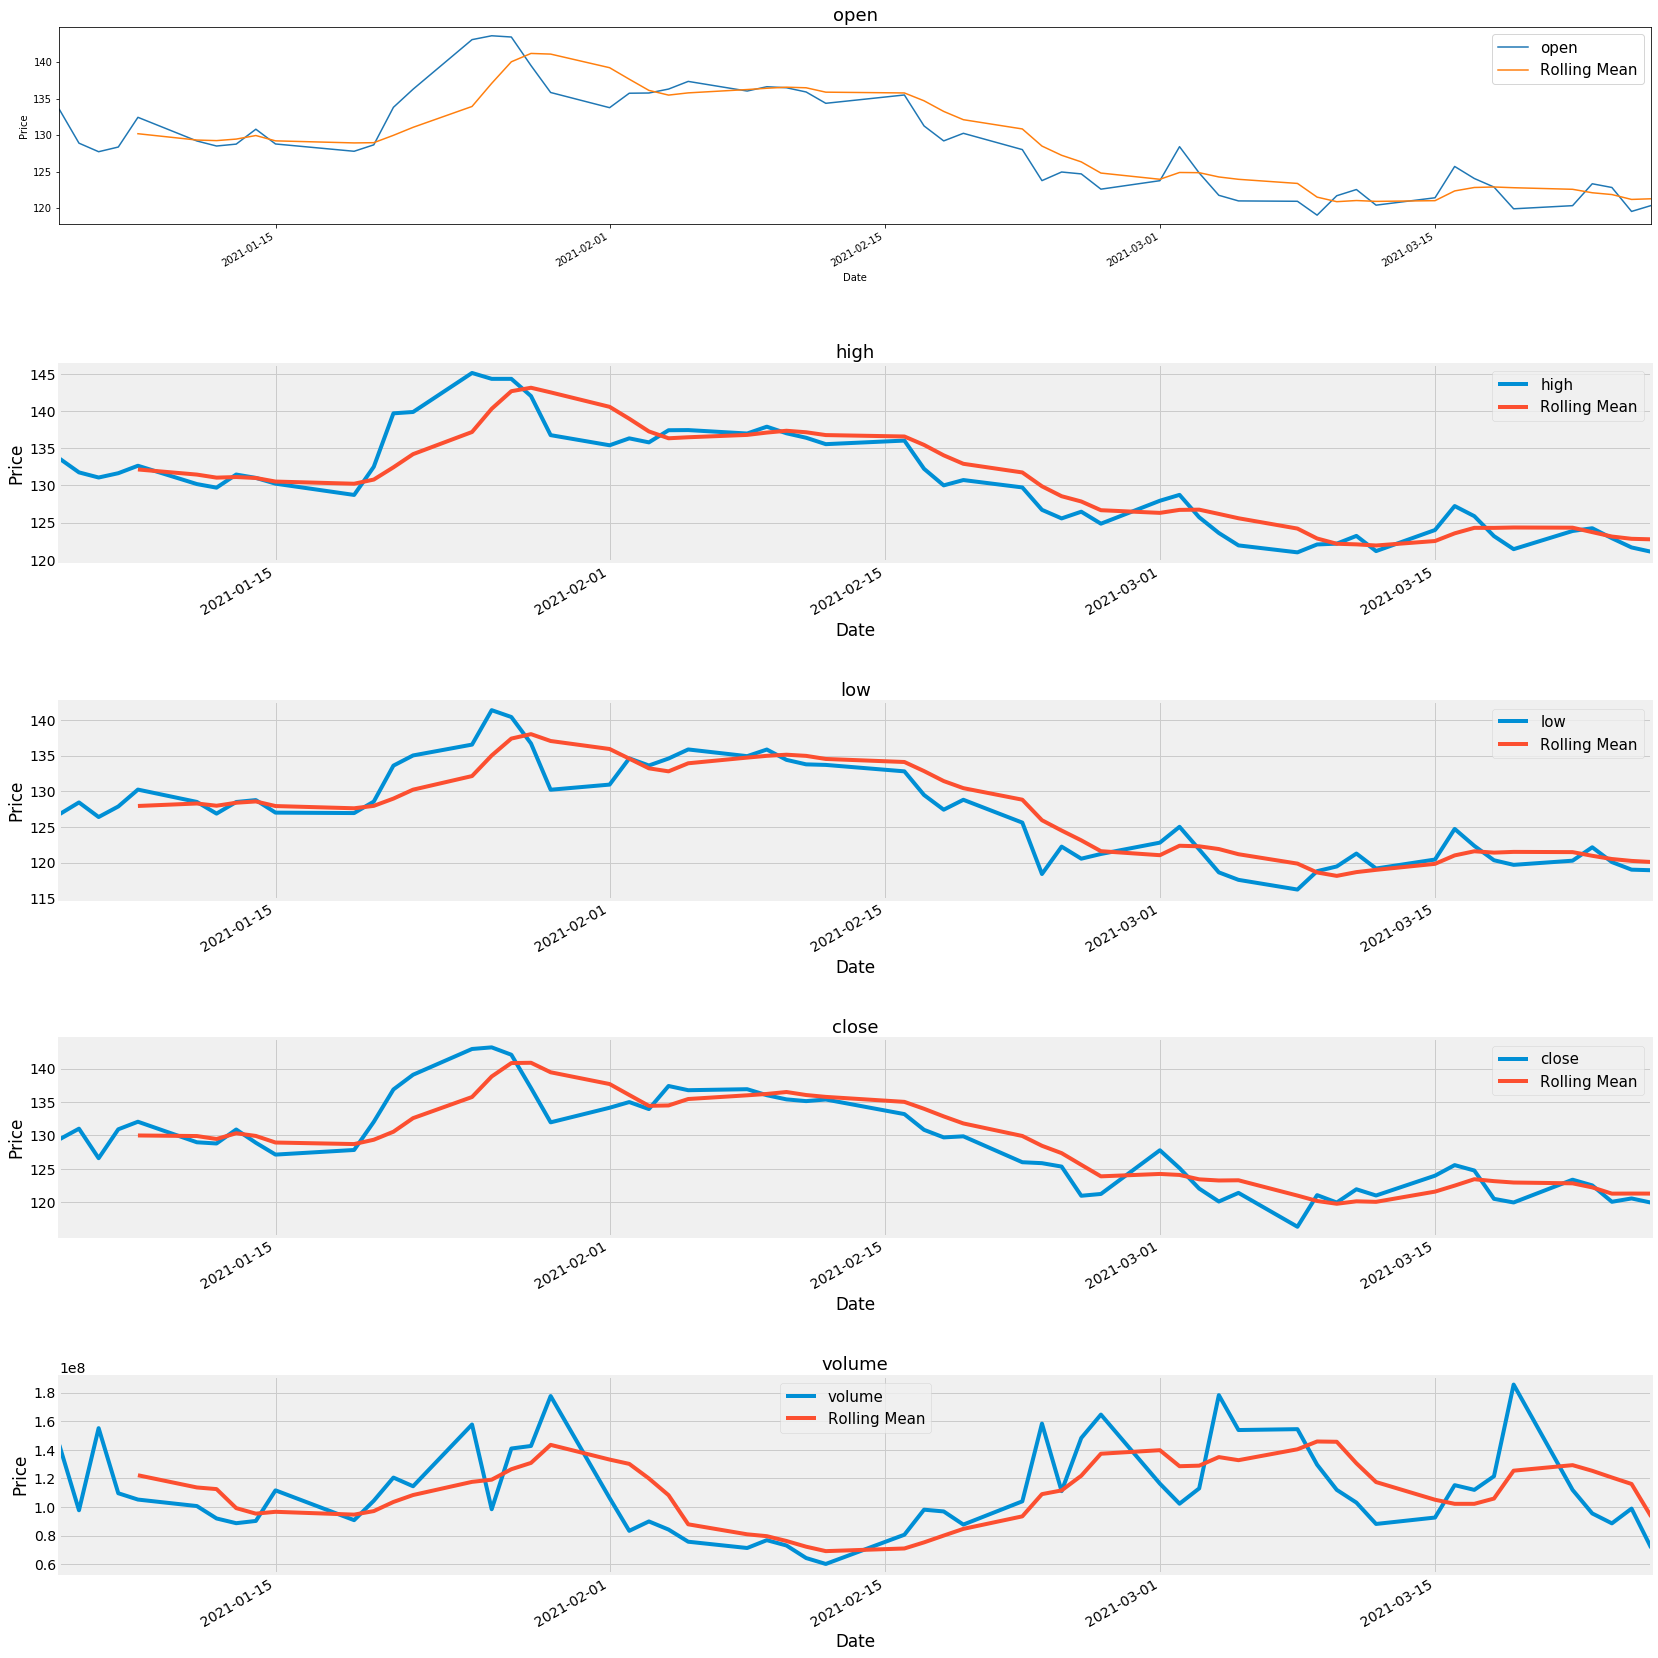

<Figure size 432x288 with 0 Axes>

In [17]:
# dataframe.rolling() function provides the feature of rolling window calculations. 
# The concept of rolling window calculation is most primarily used in signal processing and time series data.


col_names = apple_stock.columns

fig = plt.figure(figsize=(24, 24))
for i in range(5):
  ax = fig.add_subplot(5,1,i+1)
  ax.plot(apple_stock.iloc[:,i],label=col_names[i])
  apple_stock.iloc[:,i].rolling(5).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')  
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 15})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

#plt.savefig('/Users/manishparihar/Desktop/Benzinga/TimeSeries.png')
#timeseries_tag = '<img src="/Users/manishparihar/Desktop/Benzinga/TimeSeries.png" class="graph">'

In [18]:
# Linear Regression
# Define Explanatory variable. Its used to predict the Apple price for the next trading day. 
# We will use 10-day moving average and correlation to make the prediction


apple_stock['S_10'] = apple_stock['close'].shift(1).rolling(window=10).mean()
apple_stock['Corr'] = apple_stock['close'].rolling(window=10).corr(apple_stock['S_10'])
apple_stock = apple_stock.dropna()
X = apple_stock[['S_10','Corr']]
X.head()

,S_10,Corr
date,,
2021-02-01,136.013,0.088881
2021-02-02,136.713,-0.245688
2021-02-03,137.429,-0.623770
2021-02-04,137.620,-0.733109
2021-02-05,137.672,-0.781289


In [19]:
# Define target variable
y = apple_stock['close']

In [20]:
# Split data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
# Instantiate linear regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X_train,y_train)

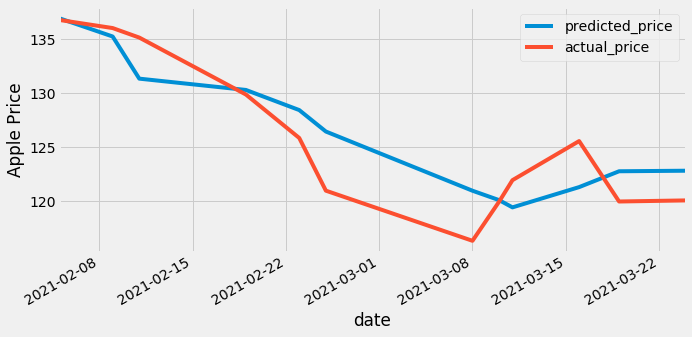

In [22]:
# Predict the Apple stock price
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index)

predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['predicted_price','actual_price'])
plt.ylabel('Apple Price')
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(apple_stock['high'],apple_stock['low'],test_size=0.2,shuffle = False, random_state=42)

In [24]:
lr = LinearRegression().fit(np.array(X_train).reshape(-1,1), y_train)

In [25]:
y_pred = lr.predict(np.array(X_test).reshape(-1,1))

In [26]:
(y_pred != y_test).mean()

1.0

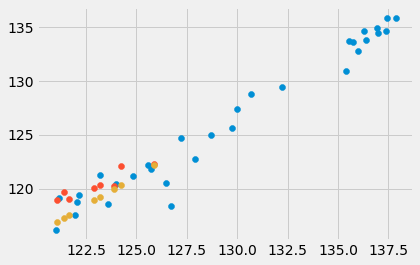

In [27]:
#  Training Data Display
plt.scatter(X_train, y_train)
# Test Data Display
plt.scatter(X_test, y_test)
# Prediction Data Display
plt.scatter(X_test, y_pred)

In [28]:
# Remove Column S_10, Corr
apple_stock= apple_stock.drop(columns=['S_10', 'Corr'],axis=1)
#apple_stock.head(5)

# Take Date's Input

In [29]:
# First Date as input
start_date = input(datetime.date)

<class 'datetime.date'>2021-02-04


In [30]:
# Second Date as input
end_date   = input(datetime.date)

<class 'datetime.date'>2021-02-25


In [31]:
from datetime import datetime
start_dated = datetime.strptime(start_date, '%Y-%m-%d')
print('Start Date:', start_dated.date())

Start Date: 2021-02-04


In [32]:
type(start_dated)

datetime.datetime

In [33]:
end_dated = datetime.strptime(end_date, '%Y-%m-%d')
print('End Date:', end_dated.date())

End Date: 2021-02-25


In [34]:
# Print all date in the given range of selected date
mynew_stock = apple_stock[start_dated:end_dated]
mynew_stock

,open,high,low,close,volume,time,date
date,,,,,,,
2021-02-04,136.30,137.4000,134.5900,137.39,84183061,1612396800000,2021-02-04
2021-02-05,137.35,137.4200,135.8600,136.76,75693830,1612483200000,2021-02-05
2021-02-08,136.03,136.9600,134.9200,136.91,71297214,1612742400000,2021-02-08
2021-02-09,136.62,137.8770,135.8500,136.01,76774213,1612828800000,2021-02-09
2021-02-10,136.48,136.9900,134.4000,135.39,73046563,1612915200000,2021-02-10
2021-02-11,135.90,136.3900,133.7700,135.13,64280029,1613001600000,2021-02-11
2021-02-12,134.35,135.5300,133.6921,135.37,60145130,1613088000000,2021-02-12
2021-02-16,135.49,136.0100,132.7900,133.19,80576316,1613433600000,2021-02-16
2021-02-17,131.25,132.2200,129.4700,130.84,98085249,1613520000000,2021-02-17


In [35]:
# Check the highest value
mynew_stock['high'].max()

137.877

In [36]:
# Check the lowest value
mynew_stock['low'].min()

118.39

In [38]:
# Displaying selected date range
mynew_stock['date']

date
2021-02-04   2021-02-04
2021-02-05   2021-02-05
2021-02-08   2021-02-08
2021-02-09   2021-02-09
2021-02-10   2021-02-10
2021-02-11   2021-02-11
2021-02-12   2021-02-12
2021-02-16   2021-02-16
2021-02-17   2021-02-17
2021-02-18   2021-02-18
2021-02-19   2021-02-19
2021-02-22   2021-02-22
2021-02-23   2021-02-23
2021-02-24   2021-02-24
2021-02-25   2021-02-25
Name: date, dtype: datetime64[ns]

# Display High and Low Stock Price

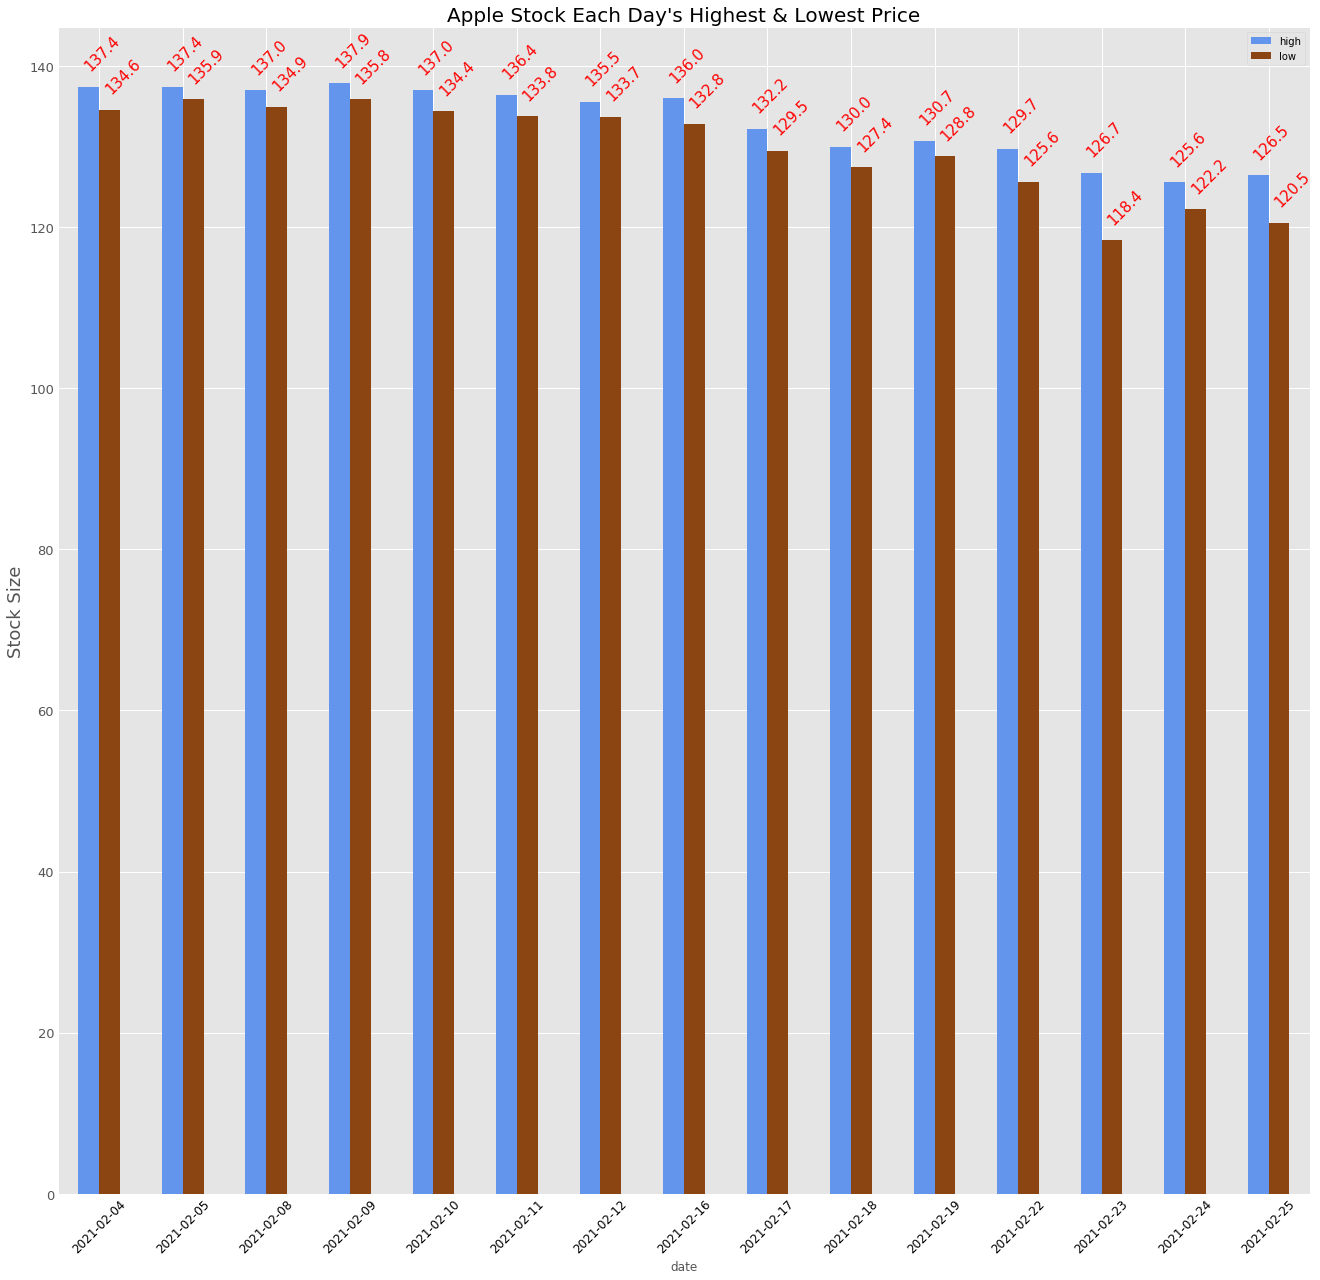

In [66]:
import matplotlib.dates as mdates
from pandas import * 

plt.style.use('ggplot')


ax = mynew_stock[['high','low']].plot(kind='bar', figsize=(20,20),color = ['CornflowerBlue', 'SaddleBrown'], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Apple Stock Each Day's Highest & Lowest Price", fontsize=20)
ax.set_ylabel("Stock Size", fontsize=18);
#ax.set_xticklabels(mynew_stock['date'], fontsize=12)
ax.set_xticklabels(mynew_stock.index.format(), fontsize=12, color='black')
plt.xticks(rotation=45)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+2, \
            str(round((i.get_height()), 1)), fontsize=15, color='red',
                rotation=45)


plt.savefig('/Users/manishparihar/Desktop/Benzinga/HighestLowest.png')
myimage_tag = '<img src="/Users/manishparihar/Desktop/Benzinga/HighestLowest.png" class="graph">'

# Display Open and Close Price

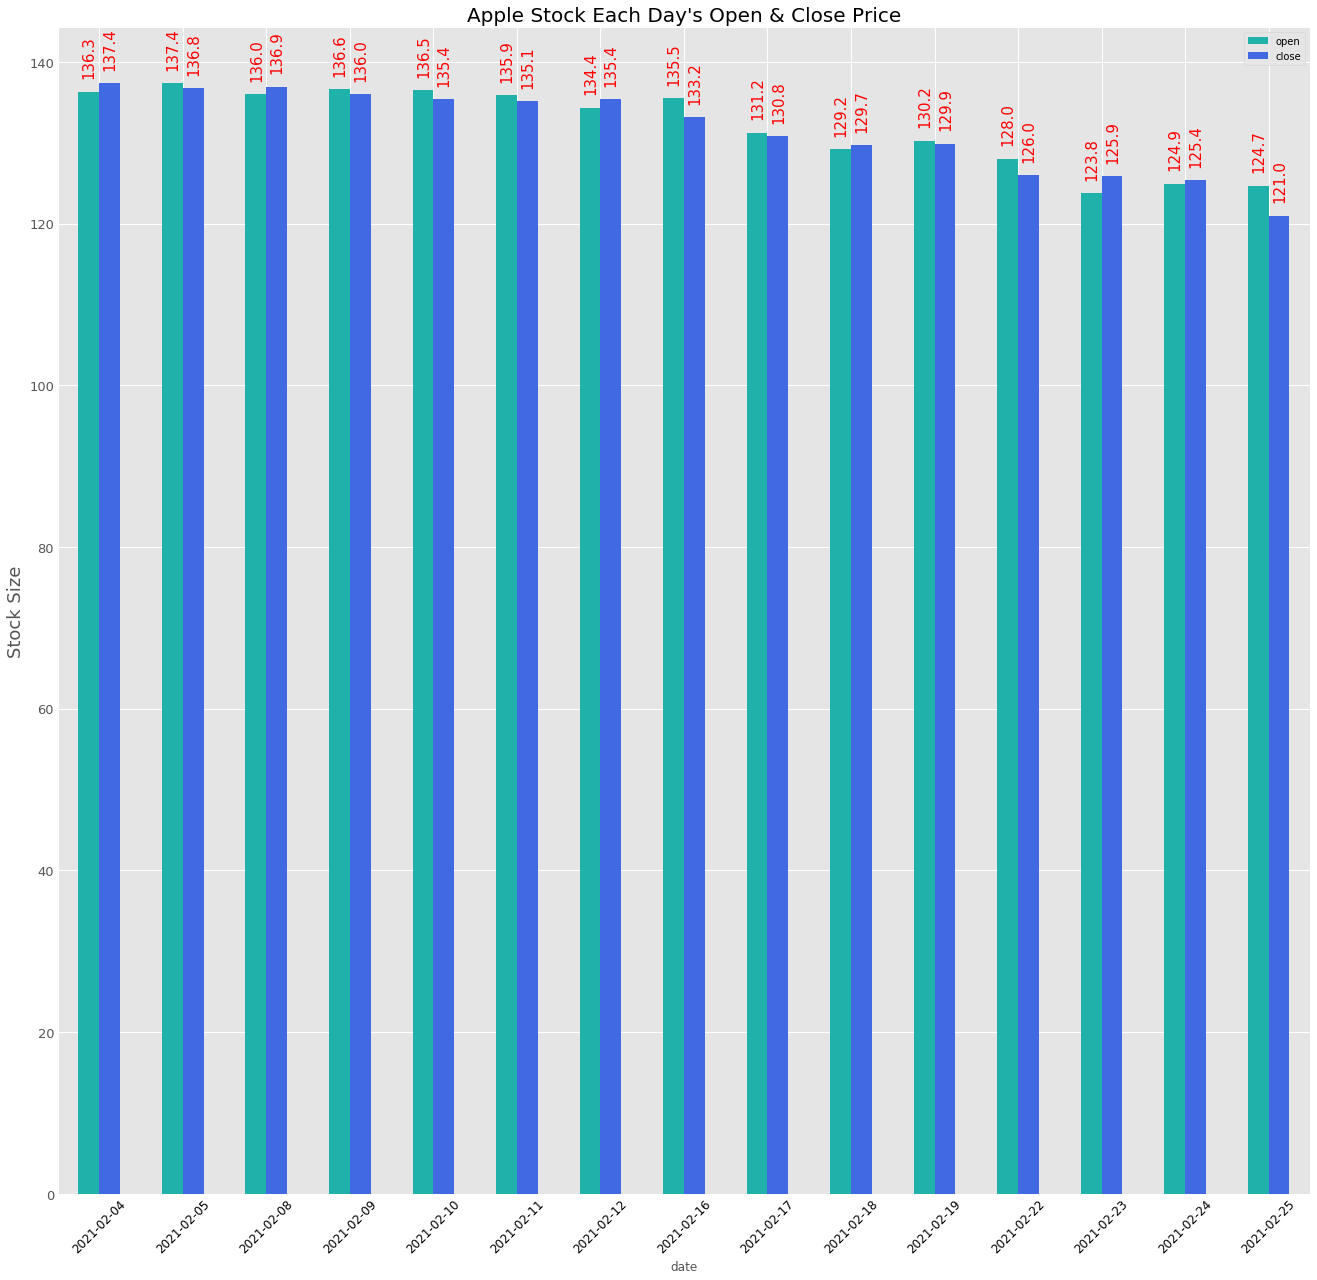

In [67]:
ax = mynew_stock[['open','close']].plot(kind='bar', figsize=(20,20),color = ['LightSeaGreen', 'RoyalBlue'], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Apple Stock Each Day's Open & Close Price", fontsize=20)
ax.set_ylabel("Stock Size", fontsize=18);
#ax.set_xticklabels(mynew_stock['date'], rotation=0, fontsize=12)
ax.set_xticklabels(mynew_stock.index.format(), fontsize=12, color='black')
plt.xticks(rotation=45)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+2, \
            str(round((i.get_height()), 1)), fontsize=15, color='red',
                rotation=90)
    

plt.savefig('/Users/manishparihar/Desktop/Benzinga/OpenClose.png')
image_tag_two = '<img src="/Users/manishparihar/Desktop/Benzinga/OpenClose.png" class="graph">'

In [68]:
#writing HTML Content
heading = '<h1> Benzinga Insights</h1>'
subheading = '<h3> APPL STOCK HISTORICAL PRICE</h3>'

style =   '<style>.graph {      width: 800px;height: 800px;}</style>'

# Using .now() from datetime library to add Time stamp
now = datetime.now()
current_time = now.strftime("%m/%d/%Y %H:%M:%S")

# Url to visit Benzinga Website
url_tag =  '<a href="https://www.benzinga.com/author/benzinga-insights">Stay tuned with Benzinga!</a>'

# Story One
story_One_tag = '<p>Looking for the Apple Stock Price based on selected time interval. The analysis show the highest price and the lowest price based on daily high value and low value of apple stock</p>'

# Story Two
story_Two_tag = '<p>Apple Stock Price Performance based on opening and closing of stock price</p>'

# Story Three
# story_Three_tag = '<p>Apple Stock Timeseries based on high, low, open, close and volume</p>'


header = '<div class="top">' + heading + subheading + style +'</div>'

footer = '<div class="bottom"> <h3> This Report has been generated\n on by Manish Parihar ' + current_time + '</h3> </div>'

content = '<div class="table">'  '</div> <div class="chart"> ' + story_One_tag + myimage_tag + story_Two_tag + image_tag_two +'</div>''<div class="table"> '+ url_tag +' </div> '



# Concating everything to a single string
html = header + content + footer

In [69]:
# Writing the file
with open('Benzinga_Report.html','w+') as file:
     file.write(html)
